In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Sangeeta\Downloads\data.csv")

In [3]:
df

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21.0,Female,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
1,24.0,Female,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26.0,Female,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30.0,Male,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31.0,Female,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP
...,...,...,...,...,...,...,...,...,...
43739,26.0,Male,1,8.88656,5.118399,8.48784,5.331942,Arts,ENTP
43740,29.0,Male,0,2.71470,6.851956,0.25519,3.623678,Unknown,ISFP
43741,25.0,Female,0,2.00982,6.544036,6.63911,6.201555,Technology,ISTJ
43742,23.0,Male,0,7.23553,4.876780,2.41671,4.654016,Arts,ENFP


In [4]:
df.Interest.unique()

array(['Arts', 'Unknown', 'Others', 'Sports', 'Technology'], dtype=object)

In [5]:
df.isnull().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

In [6]:
df.duplicated().value_counts()

False    42716
True      1028
Name: count, dtype: int64

In [11]:
df=df.drop_duplicates()

In [12]:
df.duplicated().value_counts()

False    42716
Name: count, dtype: int64

In [13]:
df.columns

Index(['Age', 'Gender', 'Education', 'Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score', 'Interest', 'Personality'],
      dtype='object')

In [15]:
cat_cols=['Gender', 'Education','Interest','Personality']

In [17]:
num_cols=[]
for i in df.columns.tolist():
    if i not in cat_cols:
        num_cols.append(i)

In [19]:
num_cols

['Age',
 'Introversion Score',
 'Sensing Score',
 'Thinking Score',
 'Judging Score']

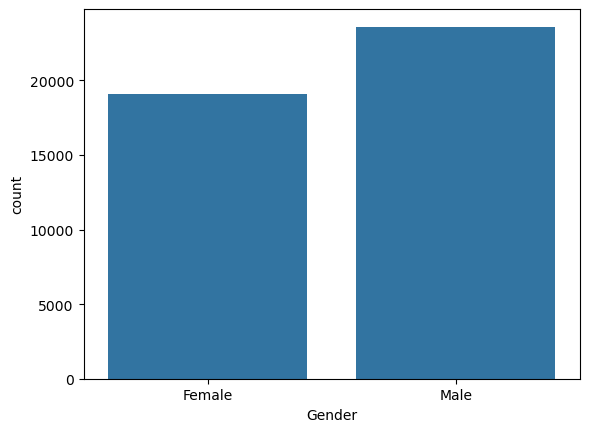

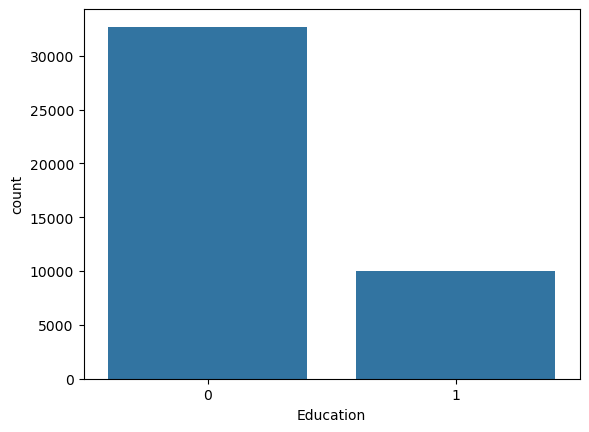

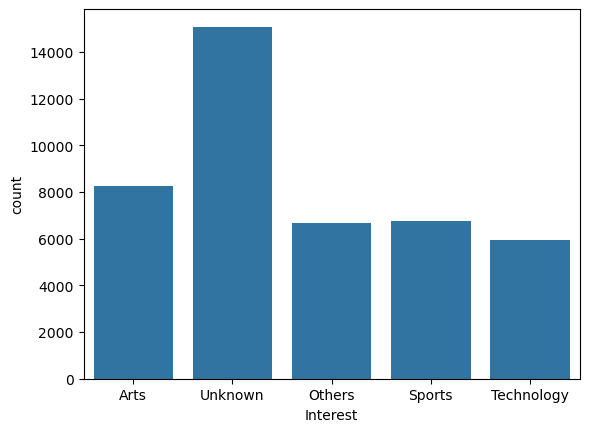

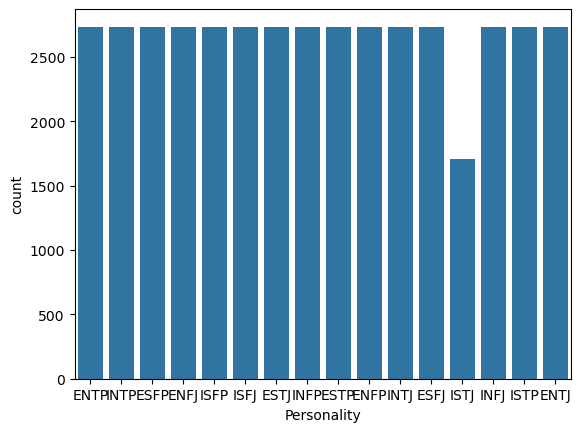

In [23]:
for i in cat_cols:
    sns.countplot(data=df, x=df[i])
    plt.show()

In [26]:
for i in cat_cols:
    print(df.groupby('Personality')[i].value_counts(normalize=True))
    print('----'*30)

Personality  Gender
ENFJ         Male      0.551939
             Female    0.448061
ENFP         Male      0.555962
             Female    0.444038
ENTJ         Female    0.565106
             Male      0.434894
ENTP         Female    0.558888
             Male      0.441112
ESFJ         Male      0.566203
             Female    0.433797
ESFP         Male      0.547549
             Female    0.452451
ESTJ         Female    0.542429
             Male      0.457571
ESTP         Female    0.541331
             Male      0.458669
INFJ         Male      0.639722
             Female    0.360278
INFP         Male      0.657279
             Female    0.342721
INTJ         Male      0.542429
             Female    0.457571
INTP         Male      0.573153
             Female    0.426847
ISFJ         Male      0.648500
             Female    0.351500
ISFP         Male      0.651061
             Female    0.348939
ISTJ         Male      0.567995
             Female    0.432005
ISTP         Male   

In [27]:
#It is noticed that gender doesnt have a major influence on the personality type, and then education might have some influence on the personality, the field of interest definitely has an influence on the personality

In [29]:
df[num_cols].corr()  #The multicollinearity doesnt exist as we can see

,Age,Introversion Score,Sensing Score,Thinking Score,Judging Score
Age,1.000000,-0.002133,0.164142,-0.009099,0.000221
Introversion Score,-0.002133,1.000000,0.015696,0.010108,0.019273
Sensing Score,0.164142,0.015696,1.000000,-0.005853,-0.010664
Thinking Score,-0.009099,0.010108,-0.005853,1.000000,-0.013308
Judging Score,0.000221,0.019273,-0.010664,-0.013308,1.000000


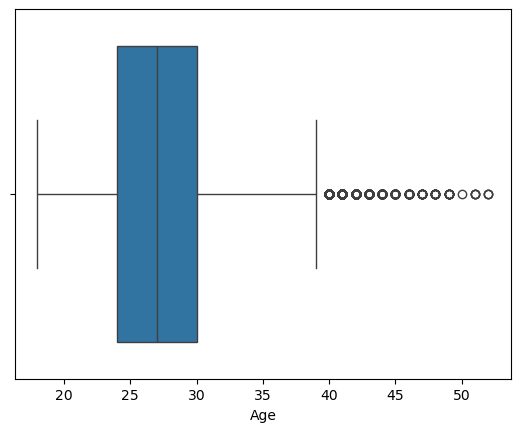

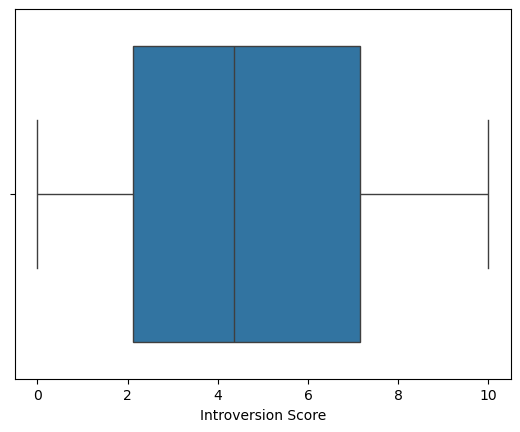

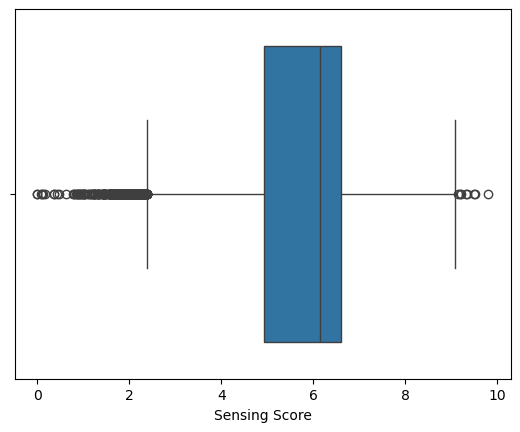

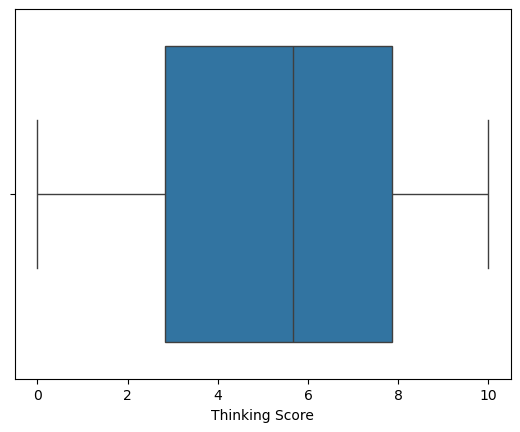

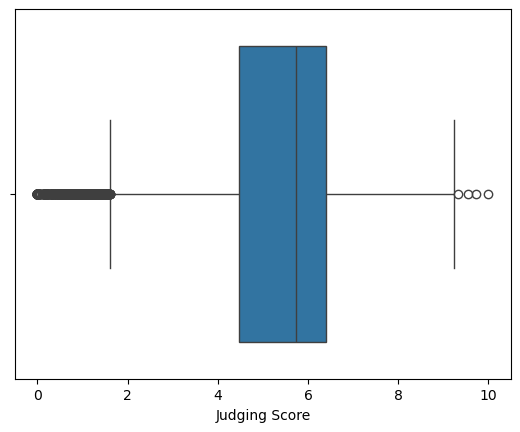

In [30]:
for i in num_cols:
    sns.boxplot(data=df,x=df[i])
    plt.show()

In [31]:
#It seems as though there are many outliers in the continuous dataset pool, so it is best to use decision tree

In [32]:
X=df.drop(columns='Personality')
y=df['Personality']

In [37]:
cat_cols='Gender', 'Education', 'Interest'

In [40]:
X = pd.get_dummies(X, drop_first=True)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred_test=model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_test))

Accuracy: 0.8565074906367042


In [47]:
y_pred_train=model.predict(X_train)
print("Accuracy:",accuracy_score(y_train,y_pred_train))

Accuracy: 1.0
